In [8]:
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd
import sys
import tkinter as tk
from tkinter import filedialog
sys.path.append("../")

from utils.preprocessing import *

In [9]:
pose_csv = '/Users/kaycei/K on Server (NoMachine)/KayCei/Naturalistic Closed Loop/AD19-D2/Videos/021624- RT BILATERAL/VideoOutputCamera 0-16022024-171157DLC_resnet50_bottomup_clearSep21shuffle1_1030000.csv'
pose_df = pd.read_csv(pose_csv, header=[0, 1, 2], index_col=0)
pose = np.array([pose_df.iloc[:, c] for c in np.arange(pose_df.shape[1]) if not np.mod(c, 3)==2]).T
print(pose.shape)

(119870, 12)


In [10]:
save_path = os.path.dirname(pose_csv)  # Get the directory of pose_csv
%store save_path
print(save_path)

Stored 'save_path' (str)
/Users/kaycei/K on Server (NoMachine)/KayCei/Naturalistic Closed Loop/AD19-D2/Videos/021624- RT BILATERAL


### original data table

In [11]:
pose_df[::3].head(40)

scorer    DLC_resnet50_bottomup_clearSep21shuffle1_1030000              \
bodyparts                                            snout               
coords                                                   x           y   
0                                               615.767212  560.111633   
3                                               613.247681  550.734131   
6                                               607.197815  546.606873   
9                                               610.574402  532.566040   
12                                              605.167358  528.721497   
15                                              592.188171  521.230042   
18                                              582.714905  537.085571   
21                                              568.712158  554.269043   
24                                              553.066833  564.894043   
27                                              533.252258  571.979431   
30                                              528.647339  579.730896   
33                                              528.143127  591.501221   
36                                              523.627686  593.297668   
39                                              520.140808  590.228882   
42                                              514.482178  587.794983   
45                                              512.177185  581.830627   
48                                              503.002533  578.908630   
51                                              505.895538  583.303650   
54                                              507.260712  578.527771   
57                                              512.972534  575.328369   
60                                              523.412292  575.411438   
63                                              523.761230  572.183105   
66                                              844.083923  586.664917   
69                                              533.240967  565.535095   
72                                              541.752869  567.997070   
75                                              550.093872  570.694519   
78                                              547.739929  572.581543   
81                                              564.356628  585.824280   
84                                              563.922363  595.702332   
87                                              551.981873  587.911621   
90                                              532.279175  572.415344   
93                                              515.499756  561.783813   
96                                              508.819092  556.437561   
99                                              498.176544  553.854492   
102                                             474.692474  549.321106   
105                                             457.319672  558.356079   
108                                             439.928894  563.497986   
111                                             426.705719  561.381042   
114                                             410.688416  566.911987   
117                                             397.062958  579.007385   

scorer                                                                  \
bodyparts            right-forepaw                        left-forepaw   
coords    likelihood             x           y likelihood            x   
0           1.000000    674.678040  563.423645   0.909077   669.408386   
3           0.999999    655.414429  571.514343   0.999195   668.686951   
6           0.999998    649.036438  568.684448   0.999920   668.133545   
9           0.999999    648.976013  566.896423   0.999900   648.945679   
12          0.999991    649.340820  566.324402   0.999881   642.850952   
15          0.999995    629.027466  555.744019   0.902887   640.307068   
18          0.999999    621.581055  554.715454   0.999975   641.206299   
21          0.999999    618.120911  551.931824   0.999998   605.817993   
24 

### after removing likelihood and headers

In [12]:
pose[:5, :]

array([[615.76721191, 560.1116333 , 674.67803955, 563.42364502,
        669.40838623, 550.98132324, 696.66925049, 564.42602539,
        701.28375244, 514.76220703, 719.04302979, 523.628479  ],
       [618.56091309, 556.46899414, 674.80651855, 563.71923828,
        669.35437012, 551.89208984, 698.36572266, 565.35479736,
        698.97943115, 517.06384277, 720.67059326, 529.56195068],
       [616.86651611, 552.95794678, 640.9173584 , 563.7800293 ,
        668.8425293 , 553.54632568, 699.11474609, 565.46478271,
        700.30078125, 517.55145264, 720.5446167 , 531.63336182],
       [613.24768066, 550.73413086, 655.41442871, 571.51434326,
        668.68695068, 553.03277588, 698.53710938, 565.18041992,
        699.49414062, 518.2520752 , 720.76177979, 532.64422607],
       [609.32293701, 549.06341553, 648.54223633, 570.51672363,
        668.25714111, 554.16369629, 699.26092529, 564.5791626 ,
        682.75439453, 525.85150146, 721.52050781, 531.08410645]])

### plot

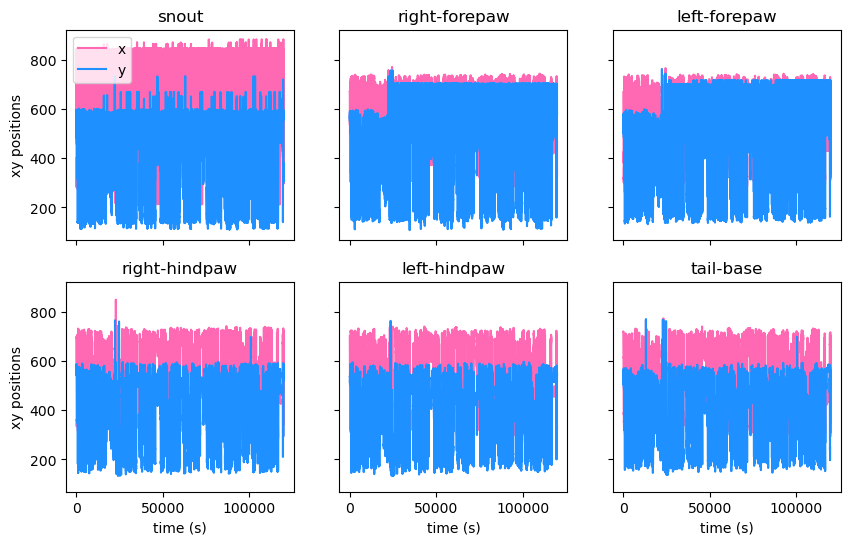

In [13]:
# plot all example files
bodyparts_names = ['snout',
                   'right-forepaw', 'left-forepaw', 
                   'right-hindpaw', 'left-hindpaw', 
                   'tail-base']
cols = 3
rows = int(np.ceil(int(pose.shape[1]/2)/cols))
count = 0
fig, ax = plt.subplots(rows, cols, figsize=(10, 6), sharex=True, sharey=True)
for row in range(rows):
    for col in range(cols):
        try:
            ax[row, col].plot(pose[:, 2*count], c='hotpink', label='x')
            ax[row, col].plot(pose[:, 2*count+1], c='dodgerblue', label='y')
            if col == 0 and row == 0:
                ax[row, col].legend()
            ax[row, col].set_title(bodyparts_names[count])
            if col == 0:
                ax[row, col].set_ylabel('xy positions')

            if row == rows-1:
                ax[row, col].set_xlabel('time (s)')
            count += 1
        except IndexError:
            pass

plt.show()



### save processed pose file 

In [14]:
np.save('../processed_data/pose_video_exp_16.npy', pose)